In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from numpy import diff

# K - MEANS Clustering Evaluation

In [2]:
cluster_data = pd.read_csv('Data_2009_2019.csv')  #Read csv
cluster_data = cluster_data[cluster_data['GP'] >=20]  #Choose players wtih more than 20 games per season
cluster_data=cluster_data.set_index(['Player','Tm','GP'])  #Set player, team and games played as index.
cluster_data.drop('Unnamed: 0',axis=1)  #Drop an unnamed column. 

,,,FGA,3P%,2P%,FT%,PTS,Height,PER,3PAr,FTr,ORB%,...,BLK%,TOV%,USG%,0-3ft,3-10ft,2P(%FG AST),3P(%FG AST),%FGA(DUNKS),%3PA(CORNERS),10-3P
Player,Tm,GP,,,,,,,,,,,,,,,,,,,,,
Arron Afflalo 2010,DEN,82,13.3,0.434,0.488,0.735,16.5,196,10.9,0.426,0.168,3.1,...,1.0,10.5,14.0,0.258,0.056,0.543,0.972,0.012,0.562,0.1300
LaMarcus Aldridge 2010,POR,78,21.9,0.313,0.498,0.757,26.1,211,18.2,0.014,0.260,8.1,...,1.3,7.4,22.9,0.247,0.215,0.570,1.000,0.078,0.375,0.2620
Malik Allen 2010,DEN,51,12.9,0.167,0.409,0.923,11.7,208,5.9,0.052,0.112,9.2,...,0.8,15.3,14.0,0.198,0.060,0.622,1.000,0.017,0.667,0.3450
Ray Allen* 2010,BOS,80,18.1,0.363,0.556,0.913,24.2,196,15.2,0.410,0.260,2.0,...,0.7,10.6,20.2,0.224,0.085,0.643,0.917,0.010,0.286,0.1400
Tony Allen 2010,BOS,54,14.9,0.000,0.520,0.605,19.4,193,14.2,0.020,0.470,7.4,...,1.7,17.8,19.6,0.640,0.142,0.628,0.000,0.063,0.200,0.0985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young 2019,ATL,81,23.2,0.324,0.477,0.829,28.6,185,17.0,0.384,0.330,2.6,...,0.5,17.6,28.4,0.265,0.143,0.211,0.423,0.000,0.037,0.1045
Cody Zeller 2019,CHO,49,13.5,0.273,0.570,0.787,19.4,213,17.2,0.064,0.409,9.4,...,2.9,13.2,16.3,0.545,0.328,0.745,1.000,0.139,0.000,0.0320
Ante Zizi? 2019,CLE,59,15.2,0.000,0.553,0.705,21.1,208,16.2,0.000,0.399,10.6,...,1.8,13.6,18.2,0.565,0.290,0.683,0.000,0.082,0.000,0.0725


In [3]:
scaler = StandardScaler()  #Scaler
X_scaled = scaler.fit_transform(cluster_data)  #Standarized data

# PCA to reduce the amount of components. 
# Graph the explained variance ratio vs # of components and the dy/dx graph to choose the right amount. 

For n_components = 7, explained variance ratio is 0.7780136264153014
For n_components = 8, explained variance ratio is 0.8096503009933397
For n_components = 9, explained variance ratio is 0.8399978478462528
For n_components = 10, explained variance ratio is 0.865683697328759
For n_components = 11, explained variance ratio is 0.8891481059855377
For n_components = 12, explained variance ratio is 0.9085536023209785
For n_components = 13, explained variance ratio is 0.9263552356381726
For n_components = 14, explained variance ratio is 0.9419879759393991
For n_components = 15, explained variance ratio is 0.9561798220534984
For n_components = 16, explained variance ratio is 0.9659539170547325
For n_components = 17, explained variance ratio is 0.9749358783047788
For n_components = 18, explained variance ratio is 0.983097925688018
For n_components = 19, explained variance ratio is 0.9909508988300274


Text(0.5, 0.98, 'Finding the right number of components')

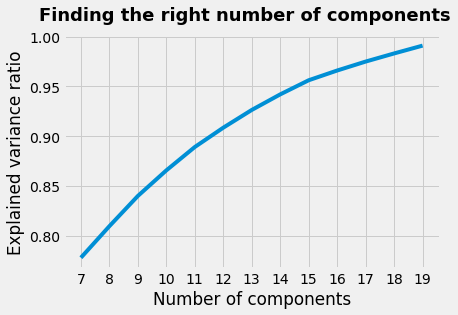

In [4]:
pca_list = []  #Empty list

for n_components in range(7, 20):
    pca = PCA(n_components = n_components)  #Apply PCA from 7 to 19 components
    components = pca.fit_transform(X_scaled)
    pca_variance = sum(pca.explained_variance_ratio_)  #Get the explained variance ratio for each component.
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(n_components, pca_variance))

plt.style.use('fivethirtyeight')
pca_fig, ax = plt.subplots()
ax.plot(range(7, 20), pca_list)
ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance ratio')
ax.set_xticks(np.arange(7, 20, 1.0))
pca_fig.suptitle("Finding the right number of components", weight = 'bold', size = 18)

Text(0.5, 0.98, 'Finding the right number of components')

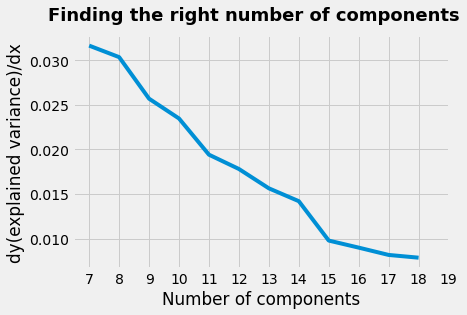

In [5]:
dy = diff(pca_list)  #Derivative of the explained variance ratio.

pca_deriv, ax = plt.subplots()
ax.plot(range(7, 19), dy)
ax.set_xlabel('Number of components')
ax.set_ylabel('dy(explained variance)/dx')
ax.set_xticks(np.arange(7, 20, 1.0))
pca_deriv.suptitle("Finding the right number of components", weight = 'bold', size = 18)

# Best approach is to used 9 and 11 components due to the dy/dx graph. 

In [6]:
#pca = PCA(n_components =11)  
pca = PCA(n_components =9)
components = pca.fit_transform(X_scaled)  #Transform each sample with the new components.
pca_df = pd.DataFrame(data = components, columns = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7',
                                                    'PC 8','PC 9'])  
                                                    #,'PC 10','PC 11']) #df with the components
cluster_data = cluster_data.reset_index()
pca_df['Player'] = cluster_data['Player']  #Add players as a column
pca_df = pca_df[['Player','PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7','PC 8','PC 9']] 
                 #,'PC 10','PC 11']] #Final df
pca_df

,Player,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,Arron Afflalo 2010,-1.754633,-2.187357,-0.934806,0.553072,1.444674,0.609567,-0.856392,0.072394,0.352632
1,LaMarcus Aldridge 2010,0.339978,2.104960,-1.904805,2.305206,1.439282,-0.814874,-0.423236,0.148534,0.296544
2,Malik Allen 2010,-0.768284,-2.668167,-0.604162,4.023811,1.980260,-0.594723,-0.366626,1.796966,-0.426044
3,Ray Allen* 2010,-1.892613,0.445908,-1.165324,0.377757,1.221264,1.758831,-0.451728,0.460595,-0.018271
4,Tony Allen 2010,2.322220,0.403395,3.112418,0.004243,2.414856,0.293665,0.902365,-1.964153,-1.096092
...,...,...,...,...,...,...,...,...,...,...
4671,Trae Young 2019,-2.669472,3.307820,2.243115,-1.461110,-1.795923,0.625642,-0.520264,0.576661,-0.212514
4672,Cody Zeller 2019,3.377783,0.527244,-0.846730,-2.227130,-0.863754,-0.572675,-0.246220,1.053525,0.125510
4673,Ante Zizi? 2019,4.206767,0.947260,-0.092306,-0.407263,-2.167292,0.409913,-0.864432,0.386741,-0.997919
4674,Ivica Zubac 2019,5.326623,2.139049,-1.278771,-1.051828,-2.217830,0.777824,-0.864580,1.062134,-1.193684


# Find the silhouette score for each row of data and the general value. This is the metric for evaluating how good or bad is the K - MEANS. If it's near 1, each sample is well assigned to it's cluster. If it's near -1 is assigned incorrectly, and near 0 the sample can be assigned to multiple clusters. 
# Also a plot on the data distribution in space of the first and second feature.

For n_clusters = 6, silhouette score is 0.16652757863106843
For n_clusters = 7, silhouette score is 0.16327126247613039
For n_clusters = 8, silhouette score is 0.1502214832983857
For n_clusters = 9, silhouette score is 0.14763883546503218
For n_clusters = 10, silhouette score is 0.1424315805196683


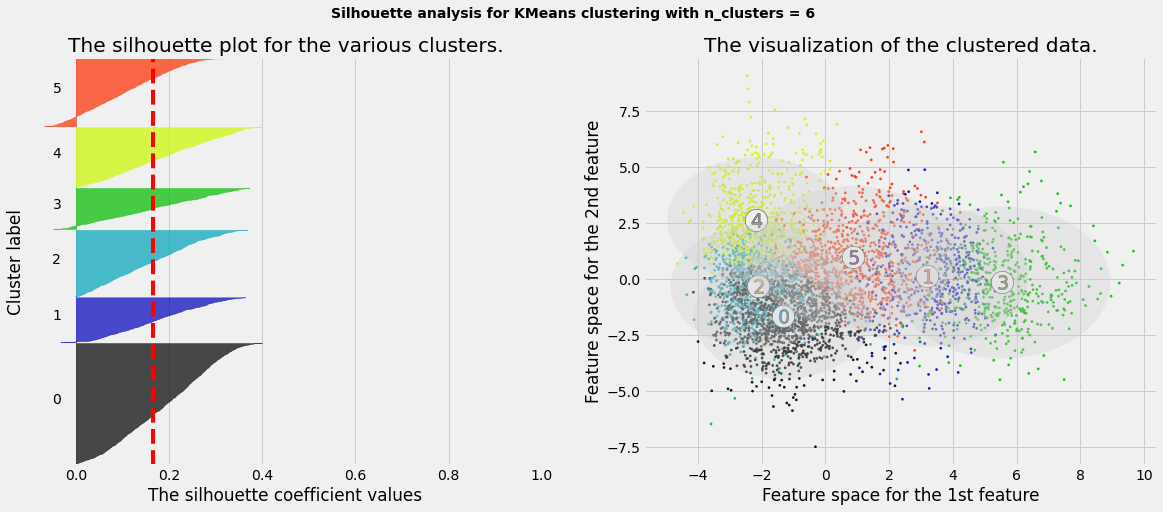

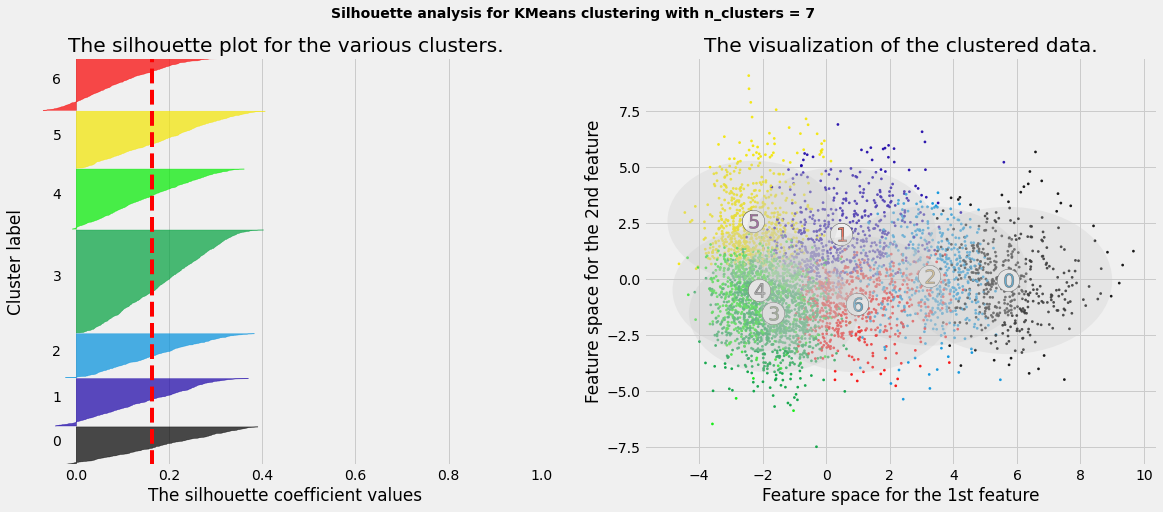

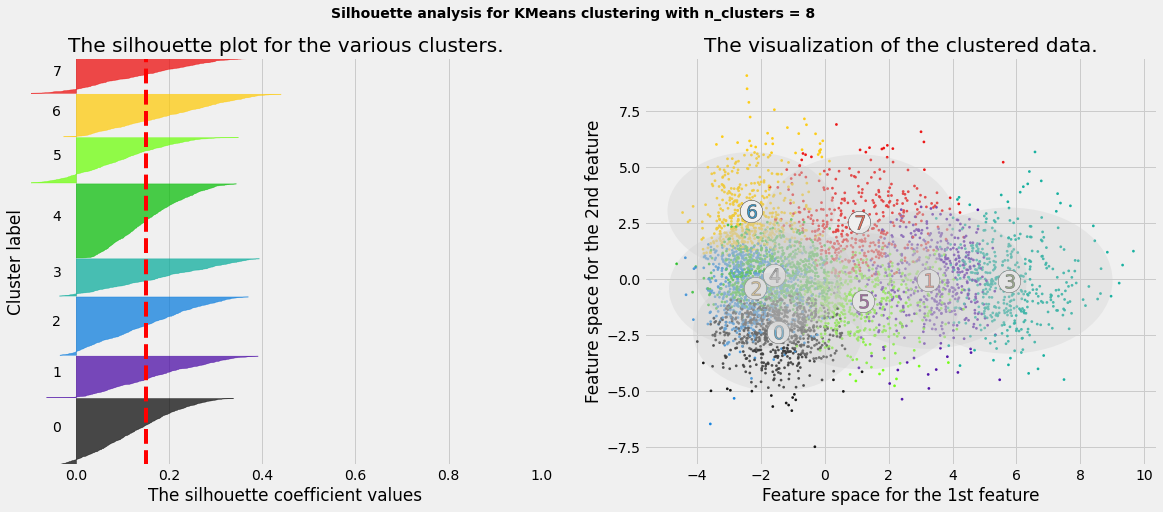

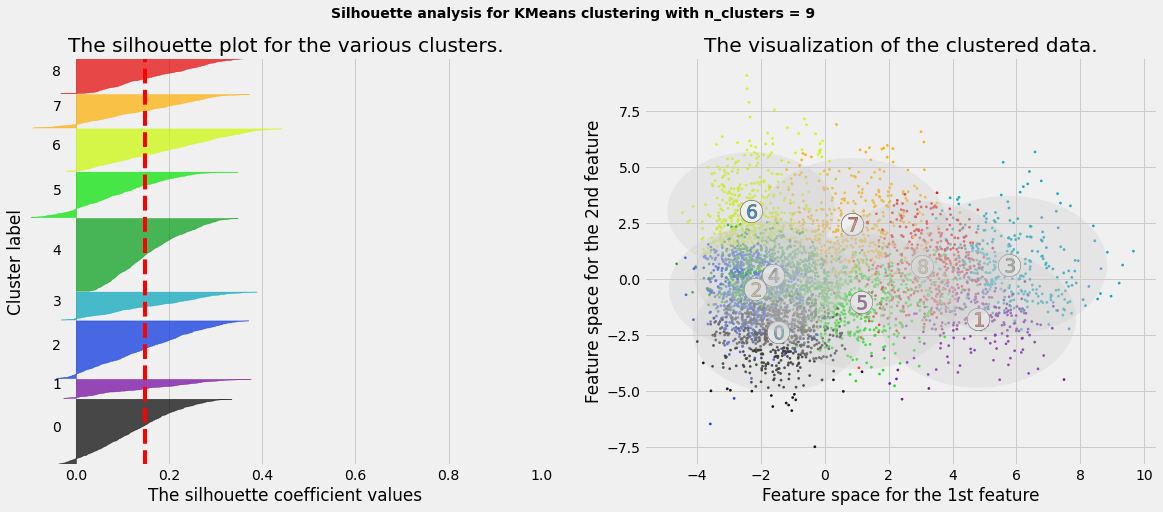

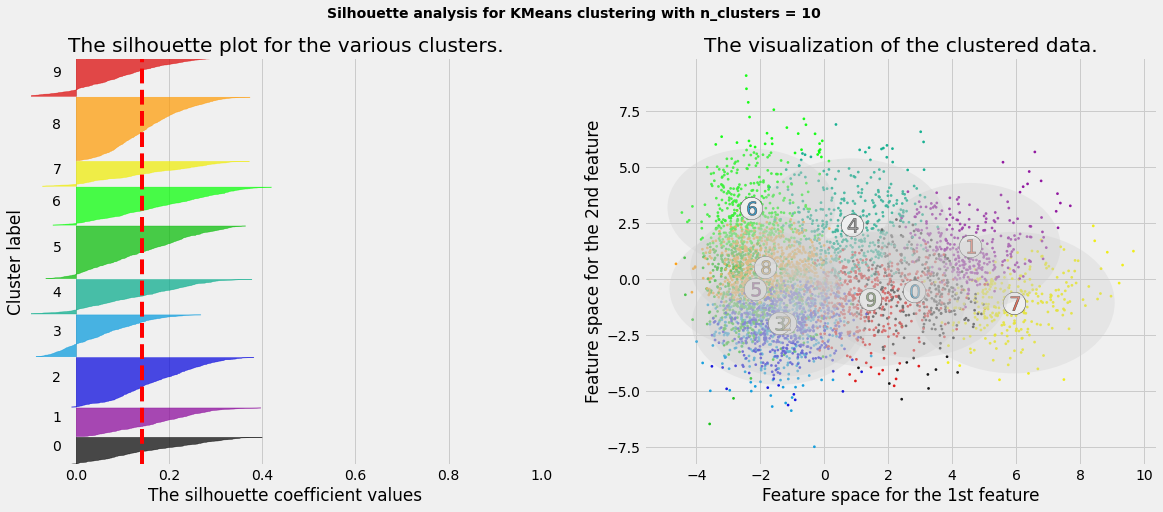

Text(0.5, 0.98, 'Finding the right number of clusters')

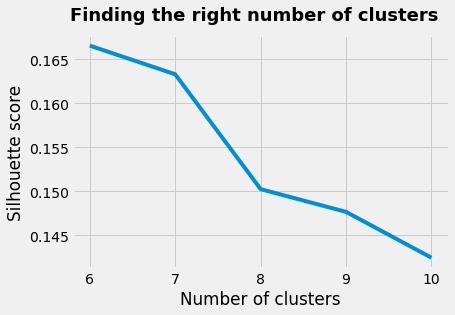

In [7]:
X_cluster = np.column_stack((pca_df['PC 1'],pca_df['PC 2'],pca_df['PC 3'],pca_df['PC 4'],pca_df['PC 5'],
                     pca_df['PC 6'],pca_df['PC 7'],pca_df['PC 8'],pca_df['PC 9'])) 
                             #,pca_df['PC 10'],pca_df['PC 11'])) # 

silhouette = []  #Empty list

for n_clusters in range(6, 11):  #Try using 6 to 11 clusters.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])  #Limit of the x-axis
   
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_cluster) + (n_clusters + 1) * 10])  # The (n_clusters+1)*10 is for inserting blank space between silhouette
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99,init='random')  #Implementation of K - MEANS
    cluster_labels = kmeans.fit_predict(X_cluster)    #Predict the right cluster for each sample. 
    score = silhouette_score(X_cluster, cluster_labels)  #Calculate the silhouette score. 
    silhouette.append(score)  
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    
    sample_silhouette_values = silhouette_samples(X_cluster, cluster_labels)  #Silhouette score for each sample of data.

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_cluster[:, 0], X_cluster[:, 1], marker='.', s=30, lw=0, alpha=0.9,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=500, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    radii = [cdist(X_cluster[cluster_labels == j], [center]).mean()
             for j, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax2.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.3, zorder=1))

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
#Plot showing general values for silhouette score
plt.show()
silhouette_fig, ax = plt.subplots()
ax.plot(range(6,11), silhouette)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(np.arange(6,11, 1.0))
silhouette_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)


In [8]:
# K MEANS WITH K-MEANS ++ INITIALIZATION
kmeans = KMeans(n_clusters = 6, random_state = 1)  #Use K - MEANS with best amount of clusters based on silhouette score.
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)


df_cluster = pd.DataFrame()
df_cluster['Player'] = pca_df['Player']
df_cluster['Cluster'] = y_kmeans  #df of the cluster assignation for each sample. 

df_cluster.head(15)

,Player,Cluster
0,Arron Afflalo 2010,2
1,LaMarcus Aldridge 2010,4
2,Malik Allen 2010,2
3,Ray Allen* 2010,2
4,Tony Allen 2010,0
5,Rafer Alston 2010,5
6,Rafer Alston 2010,5
7,Lou Amundson 2010,3
8,Chris Andersen 2010,3
9,David Andersen 2010,4


In [9]:
# K MEANS WITH RANDOM INITIALIZATION
kmeans = KMeans(n_clusters = 6, random_state = 42, init='random') 
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)


df_cluster_1 = pd.DataFrame()
df_cluster_1['Player'] = pca_df['Player']
df_cluster_1['Cluster'] = y_kmeans #df of the cluster assignation for each sample.

df_cluster_1.head(15)

,Player,Cluster
0,Arron Afflalo 2010,1
1,LaMarcus Aldridge 2010,4
2,Malik Allen 2010,1
3,Ray Allen* 2010,1
4,Tony Allen 2010,3
5,Rafer Alston 2010,2
6,Rafer Alston 2010,2
7,Lou Amundson 2010,0
8,Chris Andersen 2010,0
9,David Andersen 2010,4


In [10]:
interest_stats = ['FGA','3P%','2P%','FT%','PTS','Height','PER','3PAr','FTr','ORB%','DRB%','AST%','STL%',
                  'BLK%','TOV%','USG%','0-3ft','3-10ft','2P(%FG AST)','3P(%FG AST)','%FGA(DUNKS)',
                  '%3PA(CORNERS)','10-3P']
#Function to get the mean values of each characteristic for each cluster.
def cluster_stats(cluster):
    a=cluster_data[interest_stats].loc[df_cluster['Cluster'] == cluster].mean().sort_values(ascending=True)
    return a

In [11]:
cluster_means = pd.DataFrame()
cluster_means['Cluster 1'] = cluster_stats(0)
cluster_means['Cluster 2'] = cluster_stats(1)
cluster_means['Cluster 3'] = cluster_stats(2)
cluster_means['Cluster 4'] = cluster_stats(3)
cluster_means['Cluster 5'] = cluster_stats(4)
cluster_means['Cluster 6'] = cluster_stats(5)

cluster_means = cluster_means.T
cluster_means = round(cluster_means, 3)
cluster_means #df for mean characteristics

,3PAr,3P%,3P(%FG AST),%FGA(DUNKS),%3PA(CORNERS),10-3P,3-10ft,FTr,0-3ft,2P%,...,BLK%,AST%,ORB%,PER,TOV%,FGA,USG%,PTS,DRB%,Height
Cluster 1,0.011,0.011,0.037,0.081,0.095,0.173,0.244,0.305,0.398,0.481,...,2.768,7.680,9.597,13.320,14.258,15.218,17.530,17.778,19.378,207.907
Cluster 2,0.309,0.351,0.713,0.021,0.180,0.159,0.132,0.298,0.241,0.477,...,0.775,23.501,2.498,17.909,12.428,22.820,25.901,28.252,11.401,193.469
Cluster 3,0.450,0.348,0.941,0.034,0.357,0.114,0.100,0.195,0.221,0.468,...,1.094,8.808,3.241,10.633,11.199,14.989,16.091,17.058,12.508,199.870
Cluster 4,0.014,0.049,0.140,0.215,0.075,0.051,0.232,0.493,0.652,0.563,...,3.882,6.203,11.609,15.585,16.075,11.974,15.100,16.899,21.510,209.367
Cluster 5,0.170,0.322,0.922,0.074,0.281,0.147,0.196,0.286,0.339,0.510,...,2.410,10.558,7.411,16.798,11.669,19.196,21.468,23.591,19.823,207.059
Cluster 6,0.335,0.329,0.782,0.011,0.229,0.139,0.141,0.228,0.247,0.446,...,0.648,23.648,2.288,11.947,17.016,15.845,18.401,17.566,10.203,189.977


# The assignation of clusters to each sample was quite bad according to the silhouette score. So the best way to group NBA players based on their characteristics is using probabilistic models like Gaussian Mixture Models. 